In [1]:
import pandas as pd
import os
import shutil
import json, math
import numpy as np
import matplotlib.pyplot as plt
from time import time, strftime
from keras import backend as K
from collections import Counter
from keras.models import load_model, Sequential
from keras.utils import plot_model, to_categorical
from keras.callbacks import TensorBoard
from keras.layers import Dense, Embedding, LSTM, GRU, SimpleRNN
from keras.layers import Dropout, Bidirectional, Flatten 

Using TensorFlow backend.


In [2]:
tr = pd.read_csv('../data/pre/new_generated_train.csv', index_col=0)
te = pd.read_csv('../data/pre/new_generated_test.csv', index_col=0)

In [3]:
tr.max().values, tr.columns

(array([2805118,      80,       2,       7,       3,       6,    3401,
           3401,    6582,    3616,     720,      91,     472,       2,
           7645,       2,       5,       7,      30,      23,      59,
              4,       3,      30,       1]),
 Index(['userID', 'age', 'gender', 'education', 'marriageStatus', 'haveBaby',
        'hometown', 'residence', 'creativeID', 'adID', 'camgaignID',
        'advertiserID', 'appID', 'appPlatform', 'positionID', 'sitesetID',
        'positionType', 'weekDay', 'clickTime_d', 'clickTime_h', 'clickTime_m',
        'connectionType', 'telecomsOperator', 'conversionTime_d', 'label'],
       dtype='object'))

In [4]:
max_feature_10 = ['gender', 'education', 'marriageStatus', 'haveBaby', 'appPlatform', 
                  'sitesetID', 'positionType', 'connectionType', 'telecomsOperator' ]
max_feature_50 = None
max_feature_100 = ['age', 'advertiserID' ]

In [5]:
ls = tr.max()
for e in ls:
    print(int(math.log10(e)*4))

25
7
1
3
1
3
14
14
15
14
11
7
10
1
15
1
2
3
5
5
7
2
1
5
0


In [6]:
day_2wa = tr.loc[    (tr['clickTime_d'] == 17 )     ]
day_1wa = tr.loc[    (tr['clickTime_d'] == 24 )     ]
len(day_2wa)

294553

In [7]:
tr['clickTime_d'].unique()

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [8]:
day_cv = []
for i in tr['clickTime_d'].unique():
    a = len(tr.loc[    (tr['clickTime_d'] == i) &  (tr['label'] == 1)      ])
    day_cv.append(a)
day = []
for i in tr['clickTime_d'].unique():
    a = len(tr.loc[    (tr['clickTime_d'] == i)    ])
    day.append(a)

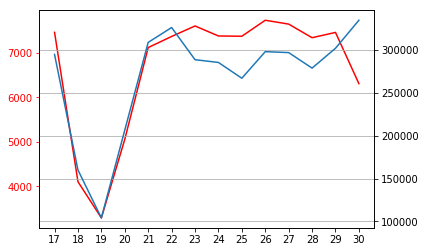

In [9]:
x = tr['clickTime_d'].unique()

fig,ax1 = plt.subplots()

ax1.plot(x, day_cv, 'r')
ax1.tick_params('y', colors='r')
ax1.xaxis.set_ticks(x)
ax2 = ax1.twinx()
ax2.plot(x, day)
plt.grid()
plt.show()


In [27]:
tr3 = tr.loc[tr['clickTime_d'] == 24]
tr3.loc[tr3['conversionTime_d'] > 24, 'label'] = 0

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
f = lambda x: eval('int((math.log10(x)+1)*4)')

In [30]:
tr3.label.mean()

0.020712237328303688

In [24]:
tr4 = tr.loc[tr['clickTime_d'] == 24]

In [26]:
tr4.label.mean()

0.025879779275141811